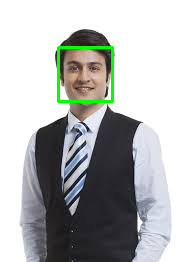

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load Haar Cascade model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load image
image_path = "/content/test.jpeg"  # Change this path if needed
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to improve contrast
gray = cv2.equalizeHist(gray)

# Apply Gaussian blur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect faces with improved parameters
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=7, minSize=(40, 40))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the image with detected faces
cv2_imshow(image)

In [ ]:
!pip install opencv-contrib-python


In [ ]:
import cv2
print(cv2.__version__)  # Check version


4.11.0


In [ ]:
!pip install opencv-contrib-python


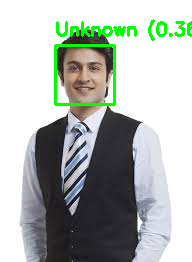

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For Colab image display

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load a reference image of a known person (Replace with your own image path)
reference_image = cv2.imread("virat.jpg")
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Detect face in the reference image
faces = face_cascade.detectMultiScale(reference_gray, 1.1, 5)

if len(faces) == 0:
    print("No face detected in reference image!")
else:
    (x, y, w, h) = faces[0]  # Take the first detected face
    reference_face = reference_gray[y:y+h, x:x+w]

# Load a test image (New image for recognition)
test_image = cv2.imread("person.jfif")
test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Detect face in the test image
test_faces = face_cascade.detectMultiScale(test_gray, 1.1, 5)

for (x, y, w, h) in test_faces:
    test_face = test_gray[y:y+h, x:x+w]

    # Compare face using OpenCV template matching
    result = cv2.matchTemplate(test_face, reference_face, cv2.TM_CCOEFF_NORMED)
    similarity = result.max()  # Get highest similarity score

    # Set a similarity threshold
    if similarity > 0.7:  # Adjust for better accuracy
        name = "virat.jpg"  # Assign a name
    else:
        name = "Unknown"

    # Draw Rectangle & Name
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(test_image, f"{name} ({similarity:.2f})", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Show result
cv2_imshow(test_image)


In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow  # Use this for image display in Colab

# Initialize ORB detector
orb = cv2.ORB_create()

# Store registered faces {name: descriptors}
face_database = {}


In [ ]:
def register_person(image_path, name):
    """Register a new person by extracting face features."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    if len(faces) == 0:
        print(f"No face found in {image_path}. Try another image.")
        return

    x, y, w, h = faces[0]  # Take first detected face
    face = img[y:y+h, x:x+w]

    keypoints, descriptors = orb.detectAndCompute(face, None)

    if descriptors is None:
        print("Failed to extract features.")
        return

    face_database[name] = descriptors
    print(f"Registered {name} successfully!")


# 📌 Upload and register an image (Run this cell in Colab and upload a file)
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]  # Get uploaded file path
person_name = input("Enter the person's name: ")
register_person(image_path, person_name)


Saving virat.jpg to virat (1).jpg
Enter the person's name: virat
Registered virat successfully!


Saving virat.jpg to virat (4).jpg
Detected person: virat


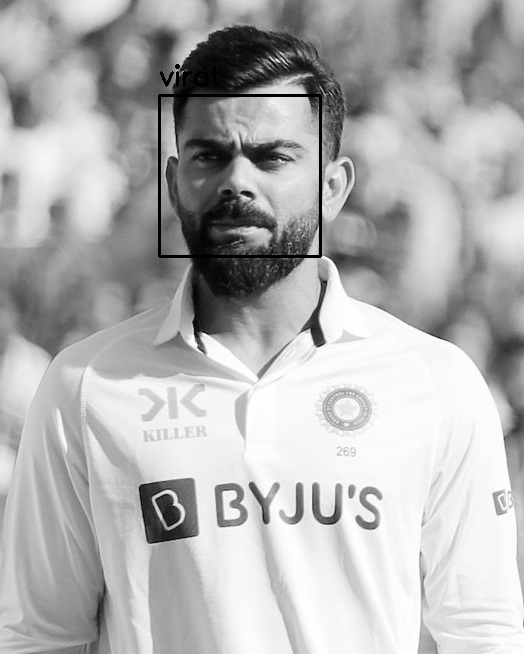

In [ ]:
def recognize_person(test_image_path):
    """Recognize a person from a test image."""
    img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    if len(faces) == 0:
        print("No face detected.")
        return

    x, y, w, h = faces[0]  # Take first detected face
    face = img[y:y+h, x:x+w]

    keypoints, test_descriptors = orb.detectAndCompute(face, None)

    if test_descriptors is None:
        print("Could not extract features from test image.")
        return

    best_match = "Unknown"
    best_score = float("inf")

    for name, stored_desc in face_database.items():
        if stored_desc is None:
            continue

        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(test_descriptors, stored_desc)
        score = sum(m.distance for m in matches) / max(len(matches), 1)

        if score < best_score and score < 50:  # Lower score = better match
            best_score = score
            best_match = name

    # Display result
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, best_match, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    print(f"Detected person: {best_match}")
    cv2_imshow(img)  # Show image in Colab


# 📌 Upload test image and recognize (Run this cell in Colab)
uploaded = files.upload()
test_image_path = list(uploaded.keys())[0]
recognize_person(test_image_path)
